# Foundations of Computer Science Project
### Kiva Dataset
Paolo Mariani
<br>Matricola 800307

#### Import all required libraries

In [235]:
import pandas as pd
import re
import datetime as dt
import math
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import random

To get repeatability of the values obtained in this project with the random function (used later) a seed is set:

In [236]:
random.seed(2020)

#### Import all required Datasets

In [237]:
loan_lenders = pd.read_csv("kiva/loans_lenders.csv")
loan_lenders.head()

,loan_id,lenders
0,483693,"muc888, sam4326, camaran3922, lachheb1865, reb..."
1,483738,"muc888, nora3555, williammanashi, barbara5610,..."
2,485000,"muc888, terrystl, richardandsusan8352, sherri4..."
3,486087,"muc888, james5068, rudi5955, daniel9859, don92..."
4,534428,"muc888, niki3008, teresa9174, mike4896, david7..."


In [238]:
loans = pd.read_csv("kiva/loans.csv")
loans.head()

,loan_id,loan_name,original_language,description,description_translated,funded_amount,loan_amount,status,activity_name,sector_name,...,raised_time,lender_term,num_lenders_total,num_journal_entries,num_bulk_entries,tags,borrower_genders,borrower_pictured,repayment_interval,distribution_model
0,657307,Aivy,English,"Aivy, 21 years of age, is single and lives in ...",NaN,125.0,125.0,funded,General Store,Retail,...,2014-01-15 04:48:22.000 +0000,7.0,3,2,1,NaN,female,true,irregular,field_partner
1,657259,Idalia Marizza,Spanish,"Doña Idalia, esta casada, tiene 57 años de eda...","Idalia, 57, is married and lives with her husb...",400.0,400.0,funded,Used Clothing,Clothing,...,2014-02-25 06:42:06.000 +0000,8.0,11,2,1,NaN,female,true,monthly,field_partner
2,658010,Aasia,English,Aasia is a 45-year-old married lady and she ha...,NaN,400.0,400.0,funded,General Store,Retail,...,2014-01-24 23:06:18.000 +0000,14.0,16,2,1,"#Woman Owned Biz, #Supporting Family, user_fav...",female,true,monthly,field_partner
3,659347,Gulmira,Russian,"Гулмире 36 лет, замужем, вместе с супругом вос...",Gulmira is 36 years old and married. She and ...,625.0,625.0,funded,Farming,Agriculture,...,2014-01-22 05:29:28.000 +0000,14.0,21,2,1,user_favorite,female,true,monthly,field_partner
4,656933,Ricky\t,English,Ricky is a farmer who currently cultivates his...,NaN,425.0,425.0,funded,Farming,Agriculture,...,2014-01-14 17:29:27.000 +0000,7.0,15,2,1,"#Animals, #Eco-friendly, #Sustainable Ag",male,true,bullet,field_partner


In [239]:
lenders = pd.read_csv("kiva/lenders.csv")
lenders.head()

,permanent_name,display_name,city,state,country_code,member_since,occupation,loan_because,loan_purchase_num,invited_by,num_invited
0,qian3013,Qian,NaN,NaN,NaN,1461300457,NaN,NaN,1.0,NaN,0
1,reena6733,Reena,NaN,NaN,NaN,1461300634,NaN,NaN,9.0,NaN,0
2,mai5982,Mai,NaN,NaN,NaN,1461300853,NaN,NaN,NaN,NaN,0
3,andrew86079135,Andrew,NaN,NaN,NaN,1461301091,NaN,NaN,5.0,Peter Tan,0
4,nguyen6962,Nguyen,NaN,NaN,NaN,1461301154,NaN,NaN,NaN,NaN,0


In [240]:
country_stats = pd.read_csv("kiva/country_stats.csv")
country_stats.head()

,country_name,country_code,country_code3,continent,region,population,population_below_poverty_line,hdi,life_expectancy,expected_years_of_schooling,mean_years_of_schooling,gni,kiva_country_name
0,India,IN,IND,Asia,Southern Asia,1339180127,21.9,0.623559,68.322,11.696590,6.298834,5663.474799,India
1,Nigeria,NG,NGA,Africa,Western Africa,190886311,70.0,0.527105,53.057,9.970482,6.000000,5442.901264,Nigeria
2,Mexico,MX,MEX,Americas,Central America,129163276,46.2,0.761683,76.972,13.299090,8.554985,16383.106680,Mexico
3,Pakistan,PK,PAK,Asia,Southern Asia,197015955,29.5,0.550354,66.365,8.106910,5.089460,5031.173074,Pakistan
4,Bangladesh,BD,BGD,Asia,Southern Asia,164669751,31.5,0.578824,71.985,10.178706,5.241577,3341.490722,Bangladesh


### 1) Normalize the loan_lenders table. In the normalized table, each row must have one loan_id and one lender

The Dataset must be normalized, in each value of the column "lenders" there's a list of users which has to be normalized and split in different rows (one for each user).

In [241]:
loan_lenders["lenders"] = loan_lenders["lenders"].str.split(", ")
loan_lenders_norm = loan_lenders.explode("lenders")
loan_lenders_norm.columns = ["loan_id", "lender"]
loan_lenders_norm.head()

,loan_id,lender
0,483693,muc888
0,483693,sam4326
0,483693,camaran3922
0,483693,lachheb1865
0,483693,rebecca3499


In [242]:
len(loan_lenders_norm)

28293931

In [243]:
loan_lenders_norm.reset_index(drop = True, inplace = True)
loan_lenders_norm.head()

,loan_id,lender
0,483693,muc888
1,483693,sam4326
2,483693,camaran3922
3,483693,lachheb1865
4,483693,rebecca3499


### 2) For each loan, add a column duration corresponding to the number of days between the disburse time and the planned expiration time. If any of those two dates is missing, also the duration must be missing

In [244]:
loans.head()[["loan_id", "loan_name", "planned_expiration_time", "disburse_time"]]

,loan_id,loan_name,planned_expiration_time,disburse_time
0,657307,Aivy,2014-02-14 03:30:06.000 +0000,2013-12-22 08:00:00.000 +0000
1,657259,Idalia Marizza,2014-03-26 22:25:07.000 +0000,2013-12-20 08:00:00.000 +0000
2,658010,Aasia,2014-02-15 21:10:05.000 +0000,2014-01-09 08:00:00.000 +0000
3,659347,Gulmira,2014-02-21 03:10:02.000 +0000,2014-01-17 08:00:00.000 +0000
4,656933,Ricky\t,2014-02-13 06:10:02.000 +0000,2013-12-17 08:00:00.000 +0000


The duration attribute is computed with a simple difference between "planned_expiration_time" and "disburse_time" in datetime format. All the values of these attributes that are missing automatically set the "duration" attribute as None.

In [245]:
loans["planned_expiration_time"] = pd.to_datetime(loans["planned_expiration_time"])
loans["disburse_time"] = pd.to_datetime(loans["disburse_time"])

In [246]:
loans["duration"] = loans["planned_expiration_time"] - loans["disburse_time"]
loans[loans["planned_expiration_time"].isnull()]["duration"] == None
loans[loans["disburse_time"].isnull()]["duration"] == None
print(len(loans[loans.duration.isnull()]))
loans.duration.head()

374645


0   53 days 19:30:06
1   96 days 14:25:07
2   37 days 13:10:05
3   34 days 19:10:02
4   57 days 22:10:02
Name: duration, dtype: timedelta64[ns]

In [247]:
len(loans[loans.duration.isnull()])/len(loans)

0.26390754624343216

There are currently 374645 missing values (26.39% of the dataset). I do compute the day attribute from the "duration" column by obtaining the .days attribute with a lambda function:

In [248]:
loans["duration"] = loans.apply(lambda x: x["duration"].days, axis = 1)
loans["duration"]

0          53.0
1          96.0
2          37.0
3          34.0
4          57.0
           ... 
1419602    39.0
1419603    39.0
1419604    51.0
1419605    63.0
1419606    61.0
Name: duration, Length: 1419607, dtype: float64

In [249]:
len(loans[loans.planned_expiration_time<loans.disburse_time])

14935

There are also 14935 values where the duration time is negative

The result of the computing is the following:

In [250]:
loans.head()[["loan_id", "loan_name", "planned_expiration_time", "disburse_time", "duration"]]

,loan_id,loan_name,planned_expiration_time,disburse_time,duration
0,657307,Aivy,2014-02-14 03:30:06+00:00,2013-12-22 08:00:00+00:00,53.0
1,657259,Idalia Marizza,2014-03-26 22:25:07+00:00,2013-12-20 08:00:00+00:00,96.0
2,658010,Aasia,2014-02-15 21:10:05+00:00,2014-01-09 08:00:00+00:00,37.0
3,659347,Gulmira,2014-02-21 03:10:02+00:00,2014-01-17 08:00:00+00:00,34.0
4,656933,Ricky\t,2014-02-13 06:10:02+00:00,2013-12-17 08:00:00+00:00,57.0


### 3) Find the lenders that have funded at least twice

In [251]:
loan_lenders_norm.head()

,loan_id,lender
0,483693,muc888
1,483693,sam4326
2,483693,camaran3922
3,483693,lachheb1865
4,483693,rebecca3499


I do calculate the number of loans made by each lender by grouping them by the lender's name, then counting the number of items in each group:

In [252]:
lenders_funds = loan_lenders_norm.groupby("lender")["loan_id"].count().reset_index()
lenders_funds.columns = ["lender", "fund_count"]
lenders_funds.head()

,lender,fund_count
0,000,40
1,00000,39
2,0002,70
3,00mike00,1
4,0101craign0101,71


Then, the result is filtered to obtain only the lenders which have made more than one loan:

In [253]:
lenders_funds[lenders_funds["fund_count"]>1][["lender", "fund_count"]].head()

,lender,fund_count
0,000,40
1,00000,39
2,0002,70
4,0101craign0101,71
5,0132575,4


### 4) For each country, compute how many loans have involved that country as borrowers

In [254]:
print(f"The number of loans that have unknown country name is {loans.country_name.isnull().sum()}")
loans.country_code.value_counts().reset_index()

The number of loans that have unknown country name is 0


,index,country_code
0,PH,285336
1,KE,143699
2,PE,86000
3,KH,79701
4,SV,64037
...,...,...
90,UY,1
91,BW,1
92,MR,1
93,PG,1


There are no missing values in the "country_name" column, most of the loans are distributed in Philippines, Kenya and Perù. <br> To compute how many times each country is involved in loans as borrower the "loans" dataset is grouped by the attribute "country_name":

In [255]:
country_count = loans.groupby("country_name")["loan_id"].count().reset_index()
country_count.columns = ["country_name", "count"]
country_count.head()

,country_name,count
0,Afghanistan,2337
1,Albania,3075
2,Armenia,13952
3,Azerbaijan,10172
4,Belize,218


### 5) For each country, compute the overall amount of money borrowed

To compute the result, the "loans" dataset must be grouped by the "country_code" column. Here is proposed a simplified version of the "loans" dataframe with the interesting features:

In [256]:
loans.country_code.isnull().sum()

9

In [257]:
loans[loans.country_code.isnull()]["country_name"]

82889      Namibia
156970     Namibia
598087     Namibia
684876     Namibia
971827     Namibia
1134818    Namibia
1214923    Namibia
1281022    Namibia
1415763    Namibia
Name: country_name, dtype: object

All the "country_code" in loans which have null values are representative of Namibia.
Namibia has also a null value in "country_stats" as can be seen in below.

In [258]:
indice_namibia = country_stats[country_stats.country_name == "Namibia"].index
country_stats.loc[indice_namibia, "country_code"] = "NMB"
country_stats.loc[indice_namibia]

,country_name,country_code,country_code3,continent,region,population,population_below_poverty_line,hdi,life_expectancy,expected_years_of_schooling,mean_years_of_schooling,gni,kiva_country_name
115,Namibia,NMB,NAM,Africa,Southern Africa,2533794,28.7,0.640007,65.062,11.657589,6.676,9769.848507,Namibia


The value null of the "country_code" of Namibia is then changed with NMB in "country_stats" and in "loans":

In [259]:
loans.loc[loans.country_code.isnull(), "country_code"] = "NMB"
print(loans.country_code.isnull().sum())

0


In [260]:
loans[["loan_id", "country_code", "disburse_time", "planned_expiration_time", "funded_amount", "loan_amount", "currency", "duration"]]

,loan_id,country_code,disburse_time,planned_expiration_time,funded_amount,loan_amount,currency,duration
0,657307,PH,2013-12-22 08:00:00+00:00,2014-02-14 03:30:06+00:00,125.0,125.0,PHP,53.0
1,657259,HN,2013-12-20 08:00:00+00:00,2014-03-26 22:25:07+00:00,400.0,400.0,HNL,96.0
2,658010,PK,2014-01-09 08:00:00+00:00,2014-02-15 21:10:05+00:00,400.0,400.0,PKR,37.0
3,659347,KG,2014-01-17 08:00:00+00:00,2014-02-21 03:10:02+00:00,625.0,625.0,KGS,34.0
4,656933,PH,2013-12-17 08:00:00+00:00,2014-02-13 06:10:02+00:00,425.0,425.0,PHP,57.0
...,...,...,...,...,...,...,...,...
1419602,988180,KE,2015-11-23 08:00:00+00:00,2016-01-02 01:00:03+00:00,400.0,400.0,KES,39.0
1419603,988213,PH,2015-11-24 08:00:00+00:00,2016-01-02 16:40:07+00:00,300.0,300.0,PHP,39.0
1419604,989109,GH,2015-11-13 08:00:00+00:00,2016-01-03 22:20:04+00:00,2425.0,2425.0,GHS,51.0
1419605,989143,PH,2015-11-03 08:00:00+00:00,2016-01-05 08:50:02+00:00,100.0,100.0,PHP,63.0


It is necessary to consider if items from the dataset contain null values for "loan_amount":

In [261]:
print(f"There are {loans.loan_amount.isnull().sum()} null values in the loans dataframe")

There are 0 null values in the loans dataframe


The result is computed with a group_by and a sum function evaluated on it:

In [262]:
loan_per_country = loans.groupby("country_code")["country_code", "funded_amount", "loan_amount"].sum().reset_index()
loan_per_country.head()

C:\Users\paolo\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,country_code,funded_amount,loan_amount
0,AF,1964650.0,1967950.0
1,AL,3992475.0,4307350.0
2,AM,20284675.0,22950475.0
3,AZ,14191350.0,14784625.0
4,BA,477250.0,477250.0


### 6) Like the previous point, but expressed as a percentage of the overall amount lent

In [263]:
total_loans_amount = loan_per_country["loan_amount"].sum()
total_funded_amount = loan_per_country["funded_amount"].sum()

In [264]:
loan_per_country["funded_amount_perc"] = round(loan_per_country["funded_amount"]/total_funded_amount*100, 3)
loan_per_country["loan_amount_perc"] = round(loan_per_country["loan_amount"]/total_loans_amount*100, 3)
loan_per_country.head()

,country_code,funded_amount,loan_amount,funded_amount_perc,loan_amount_perc
0,AF,1964650.0,1967950.0,0.174,0.167
1,AL,3992475.0,4307350.0,0.353,0.365
2,AM,20284675.0,22950475.0,1.795,1.943
3,AZ,14191350.0,14784625.0,1.256,1.251
4,BA,477250.0,477250.0,0.042,0.040


In [265]:
loan_per_country.sort_values(by = "loan_amount_perc", ascending=False)

,country_code,funded_amount,loan_amount,funded_amount_perc,loan_amount_perc
62,PH,97045925.0,97984600.0,8.587,8.294
60,PE,78702800.0,79437775.0,6.964,6.724
38,KE,63650255.0,66735975.0,5.632,5.649
66,PY,53715200.0,53964700.0,4.753,4.568
40,KH,50829425.0,51613525.0,4.497,4.369
...,...,...,...,...,...
87,VI,0.0,10000.0,0.000,0.001
89,VU,9250.0,9250.0,0.001,0.001
29,GU,8700.0,17300.0,0.001,0.001
12,BW,8000.0,8000.0,0.001,0.001


As can be seen, most of the loans are made in Philippines, Peru and Kenya (the top 3 contries by loans requested)

### 7-a) Like the three previous points, but split for each year (with respect to disburse time)

#### How many loans have involved that country as borrowers:

In [266]:
print(f"There are {loans.disburse_time.isnull().sum()} null values of \"disbursed_time\", so these items will not be considered to compute the result")

There are 2813 null values of "disbursed_time", so these items will not be considered to compute the result


The rows with null values in "disburse_time" are dropped, another dataset ("loans_nonull") is created for this purpose to avoid losing these informations:

In [267]:
loans_nonull = loans[loans.disburse_time.notnull()]
len(loans_nonull)

1416794

The result can be obtained by grouping the "loans" dataframe by "year";
<br> In the first case how many loans have involved that country as borrowers is computed:

In [268]:
loans_by_year = loans_nonull.groupby(loans.disburse_time.dt.year)["loan_id"].count().reset_index()
loans_by_year.columns = ["year", "number_of_loans"]
loans_by_year.year = loans_by_year.year.astype(int)
loans_by_year

,year,number_of_loans
0,2005,203
1,2006,2172
2,2007,24400
3,2008,54586
4,2009,83076
5,2010,93466
6,2011,114540
7,2012,133650
8,2013,140167
9,2014,172709


#### For each country, compute the overall amount of money borrowed:

In [269]:
loans_by_year["funded_amount"] = loans_nonull.groupby(loans_nonull.disburse_time.dt.year)["funded_amount"].sum().reset_index()["funded_amount"]
loans_by_year["loan_amount"] = loans_nonull.groupby(loans_nonull.disburse_time.dt.year)["loan_amount"].sum().reset_index()["loan_amount"]
loans_by_year.head()

,year,number_of_loans,funded_amount,loan_amount
0,2005,203,102850.0,102850.0
1,2006,2172,1375175.0,1376575.0
2,2007,24400,15439425.0,15446525.0
3,2008,54586,39384425.0,39423050.0
4,2009,83076,59477925.0,59689475.0


#### For each country, compute the overall amount of money borrowed as a percentage of the overall amount lent:

For the third task the total amount of loan and funded amounts is computed; then the loan_amount and funded_amount values for each year is divided by the respective total amount

In [270]:
tot_funded = loans_by_year["funded_amount"].sum()
tot_loan = loans_by_year["loan_amount"].sum()
print(tot_funded, tot_loan)

1128191775.0 1170496550.0


In [271]:
loans_by_year["funded_amount_perc"] = round(loans_by_year["funded_amount"]/tot_funded*100, 3)
loans_by_year["loan_amount_perc"] = round(loans_by_year["loan_amount"]/tot_loan*100, 3)
loans_by_year

,year,number_of_loans,funded_amount,loan_amount,funded_amount_perc,loan_amount_perc
0,2005,203,102850.0,102850.0,0.009,0.009
1,2006,2172,1375175.0,1376575.0,0.122,0.118
2,2007,24400,15439425.0,15446525.0,1.369,1.320
3,2008,54586,39384425.0,39423050.0,3.491,3.368
4,2009,83076,59477925.0,59689475.0,5.272,5.100
5,2010,93466,72187300.0,72609150.0,6.398,6.203
6,2011,114540,93601250.0,93699300.0,8.297,8.005
7,2012,133650,115427450.0,119977575.0,10.231,10.250
8,2013,140167,128301200.0,132043925.0,11.372,11.281
9,2014,172709,146668375.0,152270425.0,13.000,13.009


### 7-b) Considering the interpretability of the exercise task number 7, also a MultiIndex version is created:

#### How many loans have involved that country as borrowers:

In [272]:
loans_nonull = loans[loans.disburse_time.notnull()]
len(loans_nonull)

1416794

In [273]:
loans_by_state_year = loans_nonull.groupby([loans.country_code, loans.disburse_time.dt.year])["loan_id"].count()
loans_by_state_year = pd.DataFrame(loans_by_state_year)
loans_by_state_year.columns = ["loan_counts"]
loans_by_state_year.head(15)
#loans_by_state_year.year = loans_by_year.year.astype(int)
#loans_by_state_year

loan_counts
country_code disburse_time             
AF           2007.0                 408
             2008.0                 370
             2009.0                 678
             2010.0                 632
             2011.0                 247
             2015.0                   1
             2016.0                   1
AL           2012.0                 332
             2013.0                 507
             2014.0                 603
             2015.0                 638
             2016.0                 475
             2017.0                 520
AM           2009.0                  51
             2010.0                 347

#### For each country, compute the overall amount of money borrowed:

In [274]:
funded_amount_state_year = loans_nonull.groupby([loans.country_code, loans.disburse_time.dt.year]).sum()["funded_amount"]
loan_amount_state_year = loans_nonull.groupby([loans.country_code, loans.disburse_time.dt.year]).sum()["loan_amount"]
loans_by_state_year["funded_amount"] = funded_amount_state_year
loans_by_state_year["loan_amount"] = loan_amount_state_year
loans_by_state_year.head(15)

loan_counts  funded_amount  loan_amount
country_code disburse_time                                         
AF           2007.0                 408       194975.0     194975.0
             2008.0                 370       365375.0     365375.0
             2009.0                 678       581825.0     585125.0
             2010.0                 632       563350.0     563350.0
             2011.0                 247       245125.0     245125.0
             2015.0                   1         6000.0       6000.0
             2016.0                   1         8000.0       8000.0
AL           2012.0                 332       411775.0     413000.0
             2013.0                 507       780850.0     786950.0
             2014.0                 603       875225.0     902550.0
             2015.0                 638       808150.0     844375.0
             2016.0                 475       579975.0     639025.0
             2017.0                 520       536500.0     721450.0
AM           2009.0                  51        91000.0      91000.0
             2010.0                 347       731875.0     731875.0

#### For each country, compute the overall amount of money borrowed as a percentage of the overall amount lent:

In [275]:
tot_funded = loans_by_state_year["funded_amount"].sum()
tot_loan = loans_by_state_year["loan_amount"].sum()
print(tot_funded, tot_loan)

1128191775.0 1170496550.0


In [276]:
loans_by_state_year["funded_amount_perc"] = round(loans_by_state_year["funded_amount"]/tot_funded, 3)
loans_by_state_year["loan_amount_perc"] = round(loans_by_state_year["loan_amount"]/tot_loan, 3)
loans_by_state_year.head(15)

loan_counts  funded_amount  loan_amount  \
country_code disburse_time                                            
AF           2007.0                 408       194975.0     194975.0   
             2008.0                 370       365375.0     365375.0   
             2009.0                 678       581825.0     585125.0   
             2010.0                 632       563350.0     563350.0   
             2011.0                 247       245125.0     245125.0   
             2015.0                   1         6000.0       6000.0   
             2016.0                   1         8000.0       8000.0   
AL           2012.0                 332       411775.0     413000.0   
             2013.0                 507       780850.0     786950.0   
             2014.0                 603       875225.0     902550.0   
             2015.0                 638       808150.0     844375.0   
             2016.0                 475       579975.0     639025.0   
             2017.0                 520       536500.0     721450.0   
AM           2009.0                  51        91000.0      91000.0   
             2010.0                 347       731875.0     731875.0   

                            funded_amount_perc  loan_amount_perc  
country_code disburse_time                                        
AF           2007.0                      0.000             0.000  
             2008.0                      0.000             0.000  
             2009.0                      0.001             0.000  
             2010.0                      0.000             0.000  
             2011.0                      0.000             0.000  
             2015.0                      0.000             0.000  
             2016.0                      0.000             0.000  
AL           2012.0                      0.000             0.000  
             2013.0                      0.001             0.001  
             2014.0                      0.001             0.001  
             2015.0                      0.001             0.001  
             2016.0                      0.001             0.001  
             2017.0                      0.000             0.001  
AM           2009.0                      0.000             0.000  
             2010.0                      0.001             0.001

### 8) For each lender, compute the overall amount of money lent. For each loan that has more than one lender, you must assume that all lenders contributed the same amount

The number of lenders for each loan si calculated with a simple group_by on the loan_id:

In [277]:
loans_lender_number = loan_lenders_norm.groupby("loan_id").count().reset_index()
loans_lender_number.columns = ["loan_id", "lender_count"]
loans_lender_number.head()

,loan_id,lender_count
0,84,3
1,85,2
2,86,3
3,88,3
4,89,4


In [278]:
print(f"There are {len(loans_lender_number)} different loans made in the database")

There are 1387432 different loans made in the database


The lender_count for each loan is merged with the "loan_lenders_norm" database:

In [279]:
loans_lender_number = pd.merge(loans_lender_number, loan_lenders_norm, on= "loan_id")
loans_lender_number.head()

,loan_id,lender_count,lender
0,84,3,ward
1,84,3,michael
2,84,3,brooke
3,85,2,michael
4,85,2,patrick


In [280]:
loans_aug = pd.merge(loans_lender_number, loans[["loan_id", "loan_name", "num_lenders_total", "loan_amount"]], on = "loan_id")
loans_aug.head()

,loan_id,lender_count,lender,loan_name,num_lenders_total,loan_amount
0,84,3,ward,Justine,5,500.0
1,84,3,michael,Justine,5,500.0
2,84,3,brooke,Justine,5,500.0
3,85,2,michael,Geoffrey,3,500.0
4,85,2,patrick,Geoffrey,3,500.0


There are multiple cases in which the number of lenders obtained in "loans_lender_number" is different by the "num_lenders_total" attribute:

In [281]:
print(f"The number of different lenders number is {len(loans_aug[loans_aug.lender_count != loans_aug.num_lenders_total])}")
print(f"It is exactly a percentage of {len(loans_aug[loans_aug.lender_count != loans_aug.num_lenders_total])/len(loans_aug)}")

The number of different lenders number is 25574816
It is exactly a percentage of 0.9038981954845975


Based on the results obtained before, it is decided to consider only the "lender_count" attribute that is equal to the number of lenders for the specific loan:

In [282]:
loans_aug.drop(["num_lenders_total"], axis = 1, inplace = True)
loans_aug.head()

,loan_id,lender_count,lender,loan_name,loan_amount
0,84,3,ward,Justine,500.0
1,84,3,michael,Justine,500.0
2,84,3,brooke,Justine,500.0
3,85,2,michael,Geoffrey,500.0
4,85,2,patrick,Geoffrey,500.0


Once all the necessary informations are computed, the total amount of the loan ("loan_amount") is then divided by the "lender_count" to obtain how much each lender contributes to the single loan:

In [283]:
loans_aug["contribute_per_lender"] = round(loans_aug["loan_amount"]/loans_aug["lender_count"],2)
loans_aug.head()

,loan_id,lender_count,lender,loan_name,loan_amount,contribute_per_lender
0,84,3,ward,Justine,500.0,166.67
1,84,3,michael,Justine,500.0,166.67
2,84,3,brooke,Justine,500.0,166.67
3,85,2,michael,Geoffrey,500.0,250.00
4,85,2,patrick,Geoffrey,500.0,250.00


Then the total amount lent by each lender is obtained by grouping the dataset "loans_aug" by the attribute "lender" computing the sum af all its rows grouped by the index:

In [284]:
amount_per_lender = loans_aug[["lender", "contribute_per_lender"]].groupby("lender").sum().reset_index()
amount_per_lender.head()

,lender,contribute_per_lender
0,000,1764.26
1,00000,1380.68
2,0002,2472.54
3,00mike00,52.63
4,0101craign0101,2623.50


### 9) For each country, compute the difference between the overall amount of money lent and the overall amount of money borrowed. Since the country of the lender is often unknown, you can assume that the true distribution among the countries is the same as the one computed from the rows where the country is known

How many "country_code" values of "lenders" are null?

In [285]:
lenders.country_code.isnull().sum()/len(lenders)

0.620913989342637

It is decided to split in two the dataset lenders based on the value "country_code": the first set is the one with all the lenders that have a correct "country_code" value, the second one is the one which has for each row a missing value for the "country_code" attribute.<br> To solve this problem it is computed the distribution of the "country_code values" from the first set, then the same distribution is applied to the second set by choosing randomly:

In [286]:
num_lenders = len(lenders)
null_lenders = lenders[lenders.country_code.isnull()]
lenders.drop(index = null_lenders.index, inplace = True)
print("numero righe nulle " + str(len(null_lenders)))
print("numero righe non nulle " + str(len(lenders)))
print(len(null_lenders)/num_lenders, len(lenders)/num_lenders)

numero righe nulle 1458635
numero righe non nulle 890539
0.620913989342637 0.37908601065736297


From the "country_stats" dataset can be obtained the "country_name", and this can be added (after a merge) to the "lenders" dataset:

len(country_lenders)

country_lenders = pd.merge(country_stats, lenders, on = "country_code", how = "right")
print(len(country_lenders.country_name.isnull()))
country_lenders = country_lenders[["country_name", "permanent_name"]]
country_lenders.head()

country_lenders.country_name.isnull().sum()

How many missing values in country_lenders? (because is a right join there are some lenders with no country_name)

country_lenders.country_name.isnull().sum()

no_country_index = country_lenders[country_lenders.country_name.isnull()]["permanent_name"]
pd.merge(no_country_index, lenders, how = "inner", on = "permanent_name")

For these nations there is no equivalent in the "country_stats" dataframe

country_stats[country_stats.country_code == "TW"]

The number of lenders for each state can be obtained by grouping "country_lenders" by the "country_name" attribute. By doing that it is obtained a distrbution of the "country_code" attribute for the lenders which have no missing "country_code":

In [287]:
lenders.country_code.isnull().sum()

0

There are no null values as already proven, so it is computed the distribution of "country_code" attribute:

In [288]:
counts = lenders.country_code.value_counts(normalize = True)
counts

US    0.664330
CA    0.076325
GB    0.043097
AU    0.041664
DE    0.017975
        ...   
TF    0.000001
GW    0.000001
NU    0.000001
MS    0.000001
IO    0.000001
Name: country_code, Length: 234, dtype: float64

In [289]:
lenders_distribution = lenders.groupby("country_code").count()
lenders_distribution = pd.DataFrame(lenders_distribution).reset_index()
lenders_distribution = lenders_distribution.sort_values(by="permanent_name", ascending = False)
lenders_distribution = pd.merge(lenders_distribution, counts, right_index=True, left_on="country_code")
lenders_distribution.rename(columns={"permanent_name": "lenders_count", "country_code_y": "percentage"}, inplace = True)
lenders_distribution.drop(columns="country_code_x", inplace = True)
lenders_distribution["percentage"] = lenders_distribution["percentage"]*100
#total_lenders = lenders_distribution.lenders_count.sum()
#lenders_distribution["percentage"] = round(lenders_distribution["lenders_count"]/total_lenders*100, 5)
lenders_distribution[["country_code", "lenders_count", "percentage"]]

,country_code,lenders_count,percentage
216,US,591612,66.433025
35,CA,67970,7.632456
72,GB,38380,4.309749
13,AU,37103,4.166353
52,DE,16007,1.797451
...,...,...,...
157,NU,1,0.000112
109,KM,1,0.000112
141,MS,1,0.000112
98,IO,1,0.000112


<BarContainer object of 10 artists>

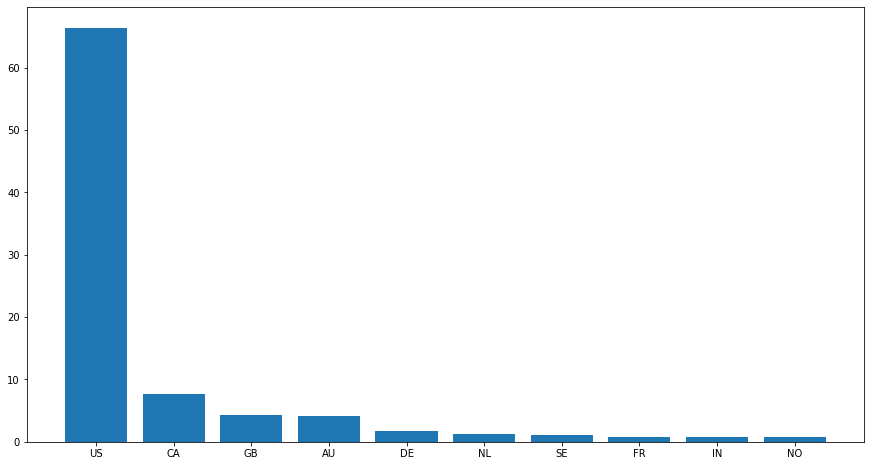

In [290]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.bar(lenders_distribution[lenders_distribution.percentage>0.6].country_code, lenders_distribution[lenders_distribution.percentage>0.6].percentage)

As can be seen, the distribution (considering only the highest percentages) for the known values of "country_code" shows that the majority of lenders are settled in USA, Canada, UK and Australia, other European states following by. <br>Once the distribution is obtained, it has to be applied to the rows of lenders which have no "country_code" value:

In [291]:
null_lenders.country_code.isnull().sum()

1458635

In [292]:
null_lenders["country_code"] = np.random.choice(counts.index, size = len(null_lenders), p = counts.values)
null_lenders["country_code"].value_counts(normalize = True)

C:\Users\paolo\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


US    6.638446e-01
CA    7.664769e-02
GB    4.319655e-02
AU    4.186860e-02
DE    1.809020e-02
          ...     
FK    6.855725e-07
GW    6.855725e-07
NU    6.855725e-07
NF    6.855725e-07
IO    6.855725e-07
Name: country_code, Length: 233, dtype: float64

In [293]:
print(f"There are {null_lenders.country_code.isnull().sum()} null values for country_code")

There are 0 null values for country_code


Selecting the distribution for each state with the series "counts" (that became "percentage" in "lenders_distribution") does make possible to give the "country_code" values to all the lenders which "country_code" was missing.

In [294]:
null_lenders_dist = null_lenders.groupby("country_code").count()
null_lenders_dist["percentage"] = null_lenders["country_code"].value_counts(normalize = True)*100
null_lenders_dist = pd.DataFrame(null_lenders_dist).reset_index()
null_lenders_dist[["country_code", "percentage"]]

,country_code,percentage
0,AD,0.001714
1,AE,0.111817
2,AF,0.026669
3,AG,0.000891
4,AI,0.000411
...,...,...
228,YE,0.020841
229,YT,0.000274
230,ZA,0.116684
231,ZM,0.007199


Only a subset of values is used for the following plot:

In [295]:
null_lenders_dist_plot = null_lenders_dist[null_lenders_dist.percentage>0.6].sort_values(by="percentage", ascending = False)
lenders_distribution_plot = lenders_distribution[lenders_distribution.percentage>0.6]
compare = pd.merge(lenders_distribution_plot,null_lenders_dist_plot,how='inner',on='country_code')
compare[["country_code", "percentage_x", "percentage_y"]].head()

,country_code,percentage_x,percentage_y
0,US,66.433025,66.384462
1,CA,7.632456,7.664769
2,GB,4.309749,4.319655
3,AU,4.166353,4.186860
4,DE,1.797451,1.809020


For the plot only 10 countries are chosen, the others will not be shown to guarantee the plot readability:

In [296]:
print(len(null_lenders_dist_plot), len(lenders_distribution_plot))

10 10


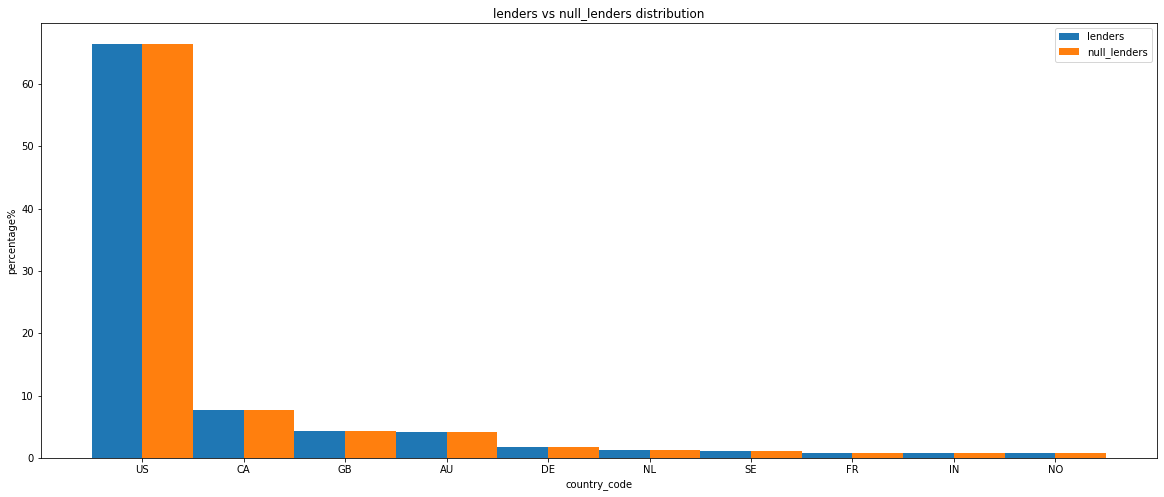

In [297]:
primo = np.arange(len(compare.country_code))
fig, ax = plt.subplots(figsize=(20, 8))
larghezza = 0.5
ax.bar(primo-larghezza/2, lenders_distribution_plot.percentage, width = larghezza, label = "lenders")
ax.bar(primo+larghezza/2, null_lenders_dist_plot.percentage, width = larghezza, label = "null_lenders")
ax.set_xticks(primo)
ax.set_xticklabels(compare.country_code)
plt.xlabel('country_code')
plt.ylabel('percentage%')
plt.title("lenders vs null_lenders distribution")
plt.legend()

To evaluate if the distribution of the data is the same of the data that were not missing, the distribution si calculated:

In [298]:
a = pd.DataFrame(list(zip(round(lenders["country_code"].value_counts(normalize = True), 2).reset_index()["country_code"], round(counts, 2).reset_index()["country_code"])), columns =["original", "null_replaced"])
print(f"The distribution of the values for the null_lenders dataset is {(a.original == a.null_replaced).sum()/len(a)*100} equal the original lenders distribution" + "\n" + "NB: Rounding by 2 decimals")

The distribution of the values for the null_lenders dataset is 100.0 equal the original lenders distribution
NB: Rounding by 2 decimals


Not a single row has been dropped by using the "country_code" attribute:

In [299]:
print(f"The initial amount of lenders is {num_lenders}")
print(f"The amount of lenders with the correct country_code is {len(lenders)}")
print(f"The amount of lenders with null value in country_code is {len(null_lenders)}")
print(f"The difference between the total initial amount of lenders and the null_lenders is {num_lenders-len(lenders)} but since there are no null values there are no dropped observations")

The initial amount of lenders is 2349174
The amount of lenders with the correct country_code is 890539
The amount of lenders with null value in country_code is 1458635
The difference between the total initial amount of lenders and the null_lenders is 1458635 but since there are no null values there are no dropped observations


The two sets can be concatenated to obtain the original lenders dataset:

In [300]:
lenders = pd.concat([lenders, null_lenders], axis = 0)

In [349]:
lenders.country_code.isnull().sum()

0

In [350]:
lenders.head()

,permanent_name,display_name,city,state,country_code,member_since,occupation,loan_because,loan_purchase_num,invited_by,num_invited
16,naresh2074,Naresh,NaN,NaN,US,1461303119,NaN,NaN,3.0,NaN,0
31,christina27976796,Christina,NaN,NaN,US,1461303341,NaN,NaN,1.0,Peter Tan,0
37,vikas1098,Vikas,Bengaluru,NaN,IN,1461301846,Software Engineer,NaN,2.0,NaN,0
39,qian1385,Qian,NaN,NaN,US,1461302036,NaN,NaN,2.0,NaN,0
42,xigg8769,Darla,Madison,NaN,US,1461302503,NaN,NaN,NaN,NaN,0


Now all the countries for all the lenders are known.<BR>in the previous task (8) the amount for each lender has been computed and it can be used to compute the total amount of lent money for each state.
<br> First the "amount_per_lender" dataset is merged with "lenders" dataset to obtain the "country_code" for each lender and the contribute that each lender gives:

In [363]:
amount_per_lender.head()

,lender,contribute_per_lender
0,000,1764.26
1,00000,1380.68
2,0002,2472.54
3,00mike00,52.63
4,0101craign0101,2623.50


In [364]:
lenders_country_amount = pd.merge(lenders[["permanent_name", "country_code"]], amount_per_lender, left_on="permanent_name", right_on="lender").sort_values(by="permanent_name", ascending=True)
lenders_country_amount.drop(columns="permanent_name", inplace = True)
lenders_country_amount.rename(columns={"contribute_per_lender":"lent"}, inplace = True)
lenders_country_amount.head()

,country_code,lender,lent
166808,US,000,1764.26
327156,DE,00000,1380.68
112735,US,0002,2472.54
1055607,US,00mike00,52.63
61658,US,0101craign0101,2623.50


In [365]:
print(len(amount_per_lender), len(lenders_country_amount))

1383799 1383799


The amount of the contrinute lent by each state is then computed by grouping by the attribute "country_code":

In [366]:
lenders_country_amount = lenders_country_amount.groupby("country_code").sum()
lenders_country_amount

,lent
country_code,
AD,20649.60
AE,1949916.40
AF,189960.84
AG,1399.74
AI,368.35
...,...
YE,63700.83
YT,256.81
ZA,715271.12


The amount of money borrowed from each state is already contained in "loan_per_country" dataset:

In [367]:
loan_per_country.head()

,country_code,funded_amount,loan_amount,funded_amount_perc,loan_amount_perc
0,AF,1964650.0,1967950.0,0.174,0.167
1,AL,3992475.0,4307350.0,0.353,0.365
2,AM,20284675.0,22950475.0,1.795,1.943
3,AZ,14191350.0,14784625.0,1.256,1.251
4,BA,477250.0,477250.0,0.042,0.040


In [368]:
lenders_country_amount = pd.merge(lenders_country_amount, loan_per_country, on ="country_code", how = "left")
lenders_country_amount.rename(columns={"loan_amount": "borrowed"}, inplace = True)
lenders_country_amount = lenders_country_amount[["country_code", "borrowed", "lent"]]
#lenders_country_amount["difference"] = lenders_country_amount["borrowed"] - lenders_country_amount["lent"]
lenders_country_amount['difference'] = lenders_country_amount.apply(lambda row: -row["lent"] if np.isnan(row["borrowed"]) else row["borrowed"]- row["lent"], axis=1)
lenders_country_amount

,country_code,borrowed,lent,difference
0,AD,NaN,20649.60,-20649.60
1,AE,NaN,1949916.40,-1949916.40
2,AF,1967950.0,189960.84,1777989.16
3,AG,NaN,1399.74,-1399.74
4,AI,NaN,368.35,-368.35
...,...,...,...,...
227,YE,3444000.0,63700.83,3380299.17
228,YT,NaN,256.81,-256.81
229,ZA,1006525.0,715271.12,291253.88
230,ZM,1978975.0,76754.03,1902220.97


Many countries haven't borrowed money, in this case the difference is the negative of the "lent" attribute

### 9) TEMPORANEO VECCHIO 9

lenders_distribution = country_lenders.groupby("country_name").count()
lenders_distribution = pd.DataFrame(lenders_distribution).reset_index()
lenders_distribution = lenders_distribution.sort_values(by="permanent_name", ascending = False)
lenders_distribution = pd.merge(lenders_distribution, counts, right_index=True, left_on="country_name")
lenders_distribution.rename(columns={"permanent_name": "lenders_count", "country_name_y": "percentage"}, inplace = True)
lenders_distribution.drop(columns="country_name_x", inplace = True)
lenders_distribution["percentage"] = lenders_distribution["percentage"]*100
#total_lenders = lenders_distribution.lenders_count.sum()
#lenders_distribution["percentage"] = round(lenders_distribution["lenders_count"]/total_lenders*100, 5)
lenders_distribution

lenders_distribution[lenders_distribution.country_name.isnull()]

fig, ax = plt.subplots(figsize=(15, 8))
ax.bar(lenders_distribution[lenders_distribution.percentage>0.6].country_name, lenders_distribution[lenders_distribution.percentage>0.6].percentage)

#As can be seen, the distribution (considering only the highest percentages) for the known values of "country_name" shows that the majority of lenders are settled in USA, Canada, UK and Australia, other European states following by. <br>Once the distribution is obtained, it has to be applied to the rows of lenders which have no "country_name" value:

null_lenders["country_name"] = np.random.choice(counts.index, size = len(null_lenders), p = counts.values)
null_lenders["country_name"].value_counts(normalize = True)

Selecting the distribution for each state with the series "counts" (that became "percentage" in "lenders_distribution") does make possible to give the "country_name" values to all the lenders which "country_code" was missing.<br> Now these values can be merged in the "country_lenders" dataframe:

null_lenders.head()

null_lenders_dist = null_lenders.groupby("country_name").count()
null_lenders_dist["percentage"] = null_lenders["country_name"].value_counts(normalize = True)*100
null_lenders_dist = pd.DataFrame(null_lenders_dist).reset_index()
null_lenders_dist

null_lenders_dist_plot = null_lenders_dist[null_lenders_dist.percentage>0.6].sort_values(by="percentage", ascending = False)
lenders_distribution_plot = lenders_distribution[lenders_distribution.percentage>0.6]
compare = pd.merge(lenders_distribution_plot,null_lenders_dist_plot,how='inner',on='country_name')
compare.head()

print(len(null_lenders_dist_plot), len(lenders_distribution_plot))

null_lenders_dist_plot.sort_values(by="percentage", ascending = False)

lenders_distribution_plot

primo = np.arange(len(compare.country_name))
fig, ax = plt.subplots(figsize=(20, 8))
larghezza = 0.5
ax.bar(primo-larghezza/2, lenders_distribution_plot.percentage, width = larghezza, label = "lenders")
ax.bar(primo+larghezza/2, null_lenders_dist_plot.percentage, width = larghezza, label = "null_lenders")
ax.set_xticks(primo)
ax.set_xticklabels(compare.country_name)
plt.xlabel('country_name')
plt.ylabel('percentage%')
plt.title("lenders vs null_lenders distribution")
plt.legend()

a = pd.DataFrame(list(zip(round(null_lenders["country_name"].value_counts(normalize = True), 2).reset_index()["country_name"], round(counts, 2).reset_index()["country_name"])), columns =["original", "null_replaced"])
print(f"The distribution of the values for the null_lenders dataset is {(a.original == a.null_replaced).sum()/len(a)*100} equal the original lenders distribution" + "\n" + "NB: Rounding by 2 decimals")m

Proven the fact that the distribution is the same, the two dataframe can be concatenated to obtain the whole lenders set:

print(f"The original number of lenders is {num_lenders}, the actual one is {len(lenders)+len(null_lenders)}")

The lenders dataset hasn't lost a single observation, the two dataframes are concatenated to recreate the original one:

null_lenders.country_name.isnull().sum()

len(lenders)

lenders.columns

lenders = pd.merge(lenders, country_lenders, on = "permanent_name")
len(lenders)

lenders.country_name.isnull().sum()

len(null_lenders)

null_lenders.country_name.isnull().sum()

lenders = pd.concat([null_lenders, lenders], axis = 0)
lenders.country_name.isnull().sum()

print(f"The amount of null values is {country_lenders.country_name.isnull().sum()/len(country_lenders)} %")

country_lenders = pd.merge(country_stats, lenders, on = "country_name")
print(len(country_lenders))
country_lenders = country_lenders[["country_name", "permanent_name"]]
country_lenders.head()

print(num_lenders)
print(len(lenders))
print(num_lenders-len(lenders))

Once again, to evaluate if the distribution of the data is the same of the data that were not missing, the distribution si calculated:

a = pd.DataFrame(list(zip(round(lenders["country_name"].value_counts(normalize = True), 2).reset_index()["country_name"], round(counts, 2).reset_index()["country_name"])), columns =["original", "null_replaced"])
print(f"The distribution of the values for the null_lenders dataset is {(a.original == a.null_replaced).sum()/len(a)*100} equal the original lenders distribution" + "\n" + "NB: Rounding by 2 decimals")

However, since the country_code is not available for all the data, there are less rows then expected

lenders

Now all the countries for all the lenders are known, in the previous task (8) the amount for each lender has been computed and it can be used to compute the total amount of lent money for each state.
<br> First the "amount_per_lender" dataset is merged with "country_lenders" dataset to obtain the "country_name" for each lender and the contribute for each one:

amount_per_lender.head()

lender_country_amount = pd.merge(country_lenders, amount_per_lender, left_on ="permanent_name", right_on="lender")
len(lender_country_amount)

lender_country_amount = lender_country_amount.groupby("country_name").sum().reset_index()
lender_country_amount

The amount of money borrowed from each state is already contained in "loan_per_country" dataset:

loan_per_country.head()

len(loan_per_country)

lender_country_amount = pd.merge(lender_country_amount, loan_per_country, on ="country_name", how = "left")
lender_country_amount.rename(columns={"contribute_per_lender": "lent", "loan_amount": "borrowed"}, inplace = True)
lender_country_amount = lender_country_amount[["country_name", "borrowed", "lent"]]
lender_country_amount["difference"] = lender_country_amount["borrowed"] - lender_country_amount["lent"]
lender_country_amount

### 10) Which country has the highest ratio between the difference computed at the previous point and the population?

In [369]:
country_stats.head()

,country_name,country_code,country_code3,continent,region,population,population_below_poverty_line,hdi,life_expectancy,expected_years_of_schooling,mean_years_of_schooling,gni,kiva_country_name
0,India,IN,IND,Asia,Southern Asia,1339180127,21.9,0.623559,68.322,11.696590,6.298834,5663.474799,India
1,Nigeria,NG,NGA,Africa,Western Africa,190886311,70.0,0.527105,53.057,9.970482,6.000000,5442.901264,Nigeria
2,Mexico,MX,MEX,Americas,Central America,129163276,46.2,0.761683,76.972,13.299090,8.554985,16383.106680,Mexico
3,Pakistan,PK,PAK,Asia,Southern Asia,197015955,29.5,0.550354,66.365,8.106910,5.089460,5031.173074,Pakistan
4,Bangladesh,BD,BGD,Asia,Southern Asia,164669751,31.5,0.578824,71.985,10.178706,5.241577,3341.490722,Bangladesh


In [370]:
lenders_country_amount = pd.merge(country_stats[["country_code", "country_name", "population"]], lenders_country_amount, on ="country_code", how= "right")
lenders_country_amount["pop_ratio"] = lenders_country_amount["difference"]/lenders_country_amount["population"]
lenders_country_amount = lenders_country_amount.sort_values(by="pop_ratio", ascending = False)
lenders_country_amount

,country_code,country_name,population,borrowed,lent,difference,pop_ratio
166,WS,Samoa,196440.0,12212175.0,1701.44,12210473.56,62.158794
92,PY,Paraguay,6811297.0,53964700.0,55181.22,53909518.78,7.914721
107,AM,Armenia,2930450.0,22950475.0,40397.08,22910077.92,7.817939
81,SV,El Salvador,6377853.0,41691550.0,56956.68,41634593.32,6.527995
116,MN,Mongolia,3075647.0,15348375.0,85779.76,15262595.24,4.962401
...,...,...,...,...,...,...,...
227,VG,NaN,NaN,NaN,1963.56,-1963.56,NaN
228,VI,NaN,NaN,10000.0,23384.29,-13384.29,NaN
229,VU,NaN,NaN,9250.0,343511.60,-334261.60,NaN
230,WF,NaN,NaN,NaN,20547.15,-20547.15,NaN


In [373]:
lenders_country_amount[lenders_country_amount.country_code == "CA"]

,country_code,country_name,population,borrowed,lent,difference,pop_ratio
71,CA,Canada,36624199.0,50000.0,9.320318e+07,-9.315318e+07,-2.543487


In [371]:
lenders_country_amount.loc[lenders_country_amount.pop_ratio.idxmax()]

country_code             WS
country_name          Samoa
population           196440
borrowed        1.22122e+07
lent                1701.44
difference      1.22105e+07
pop_ratio           62.1588
Name: 166, dtype: object

### 11) Which country has the highest ratio between the difference computed at point 9 and the population that is not below the poverty line?